In [11]:
# Example 5.1 from "Test and roll: profit maximizing A/B tests"
# https://pubsonline.informs.org/doi/abs/10.1287/mksc.2019.1194

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

import os

In [3]:
os.environ["LATEXIFY"] = ""
os.environ["FIG_DIR"] = "figures"

In [4]:
pml.latexify(width_scale_factor=2, fig_height=1.5)

In [6]:
def optimal_sample_size(N, s, sigma):
    # eqn 10
    t = (s / sigma) ** 2
    n = np.sqrt(0.25 * N * t + (0.75 * t) ** 2) - 0.75 * t
    return n


def prob_error(n1, n2, s, sigma):
    # eqn 12
    x = np.sqrt(2) * sigma / s * np.sqrt(n1 * n2 / (n1 + n2 + 1e-10))
    p = 0.25 - 1 / (2 * np.pi) * np.arctan(x)
    return 2 * p  # could have m1<m2 or m1>m2


def eprofit_deploy(N, n1, n2, s, mu, sigma):
    # eqn 9
    numer = np.sqrt(2) * sigma**2
    tmp = 2 * sigma**2 + (n1 + n2) / (n1 * n2 + 1e-10) * (s**2)
    denom = np.sqrt(np.pi) * np.sqrt(tmp)
    return (N - n1 - n2) * (mu + numer / denom)


def eprofit_test(N, n1, n2, s, mu, sigma):
    # eqn 7
    return (n1 + n2) * mu


def eprofit_total(N, n1, n2, s, mu, sigma):
    p1 = eprofit_test(N, n1, n2, s, mu, sigma)
    p2 = eprofit_deploy(N, n1, n2, s, mu, sigma)
    return p1 + p2

In [7]:
mu = 0.68
sigma = 0.03
N = 100000
s = np.sqrt(mu * (1 - mu))
nopt = optimal_sample_size(N, s, sigma)
print(nopt)  # 2283.9

n1 = nopt
n2 = nopt
p = prob_error(n1, n2, s, sigma)
print(p)  # 0.10


print(eprofit_test(N, n1, n2, s, mu, sigma))  # 3106
print(eprofit_deploy(N, n1, n2, s, mu, sigma))  # 66429.9
eprofit_opt = eprofit_total(N, n1, n2, s, mu, sigma)
error_rate_opt = prob_error(n1, n2, s, sigma)

ns = np.linspace(0, 50000, 1000)
K = len(ns)
eprofit = np.zeros(K)
error_rate = np.zeros(K)
for k, n in enumerate(ns):
    n1 = n
    n2 = n
    eprofit[k] = eprofit_total(N, n1, n2, s, mu, sigma)
    error_rate[k] = prob_error(n1, n2, s, sigma)

2283.890028194425
0.10012814134508047
3106.0904383444185
66429.90817920299


saving image to figures/ab_profit_latexified.pdf
Figure size: [3.  1.5]


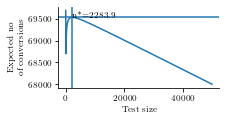

In [15]:
plt.figure()
plt.plot(ns, eprofit)
plt.xlabel("Test size")
plt.ylabel("Expected no\nof conversions")
plt.axvline(nopt)
plt.axhline(eprofit_opt)
plt.text(nopt, eprofit_opt, "n*={:0.1f}".format(nopt))
sns.despine()
pml.savefig("ab_profit")
plt.show()

saving image to figures/ab_error_latexified.pdf
Figure size: [3.  1.5]


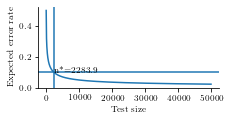

In [12]:
plt.figure()
plt.plot(ns, error_rate)
plt.xlabel("Test size")
plt.ylabel("Expected error rate")
plt.axvline(nopt)
plt.axhline(error_rate_opt)
plt.text(nopt, error_rate_opt, "n*={:0.1f}".format(nopt))
sns.despine()
pml.savefig("ab_error")